# References
## 
* 

# Parameters adjusted

# Considerations
* It is as I sliced 2mm of spinal cord, with, according to literature, contains ca. 100 motoneurons and 200 Renshaw cells.
* Injected current was added according to motoneuron size, following a linear function. It was summed to another linear function in order to counteract Renshaw cell inhibition.
* Centered motoneurons (from 2 to 4 mm) were select in order to obtain a motoneurons with homogeneous inhibitory inputs. Despite of that, the whole population from MG was simulated. Note that I considered 2mm to be something close to the maximal distance a Renshaw cell axon can cover, which agrees with literature (Lagerback and Kellerth, 1985b) but is longer than what is implemented (gaussian with standard deviation of 3.5/3mm)
* To make things simpler, I only considered type S motoneurons.
* Recording from transient state where removed. This interval was considered to be $<$2s, i.e. n$=2000/.05$.
* Ensamble motoneuron firing rate was calculated according to Uchiyama et al. (2003b).

In [1]:
import sys
sys.path.insert(0, '../../..')
import time
from scipy import signal
from scipy.fftpack import fft

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [2]:
def ensambleFR(spikeInstant, unitNumber, motoneuronQuantity, transientPeriod, simDuration):
    units = range(1,motoneuronQuantity+1)
    
    meanFR = []
    for unit in units:
        MNSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==unit]
        numberOfSpikes = len([x for x in MNSpikeInstants if x>transientPeriod])
        meanFR.append(numberOfSpikes/(simDuration*1e-3 - transientPeriod*1e-3))
    
    popSlice = [y for x, y in enumerate(meanFR) if x>100 and x<200]
    sliceFR = sum(popSlice)/(len(popSlice))
    FR = sum(meanFR)/len(meanFR)
    
    plt.figure()
    plt.plot(units, meanFR, 'o')
    plt.axhline(y=FR, color='r', linestyle='-')
    plt.axhline(y=sliceFR, color='k', linestyle='-')
    plt.show()

# Forced Simulation

In [3]:
simDuration_ms = 30000
transientPeriod_ms = 1000
Esyn = 70
timeStep_ms = 0.05
t = np.arange(0, simDuration_ms, timeStep_ms)
MNQtd = 300
availableMNs = range(MNQtd)
recordedMN = 1#np.random.choice(availableMNs)
print 'Recorded MN #'+str(recordedMN)

Recorded MN #1


## Without Renshaw

No spikes for this MN


<IPython.core.display.Javascript object>


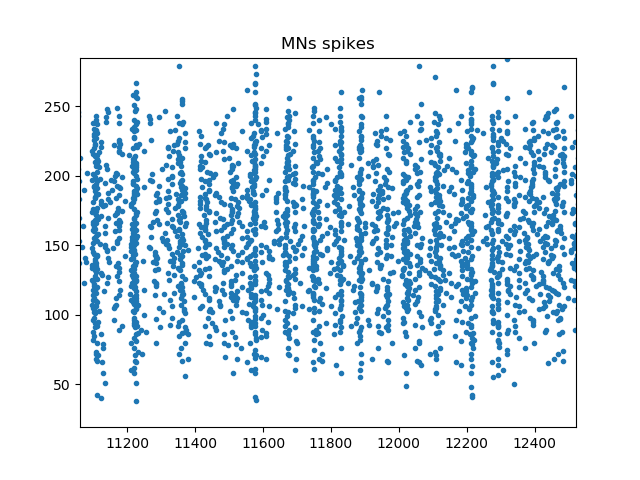

<IPython.core.display.Javascript object>


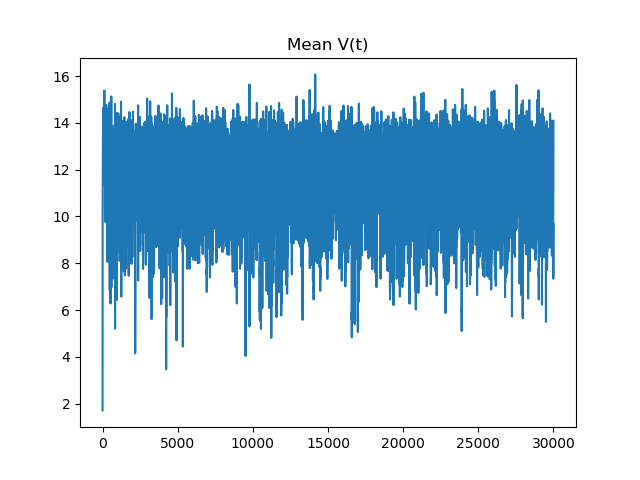

<IPython.core.display.Javascript object>


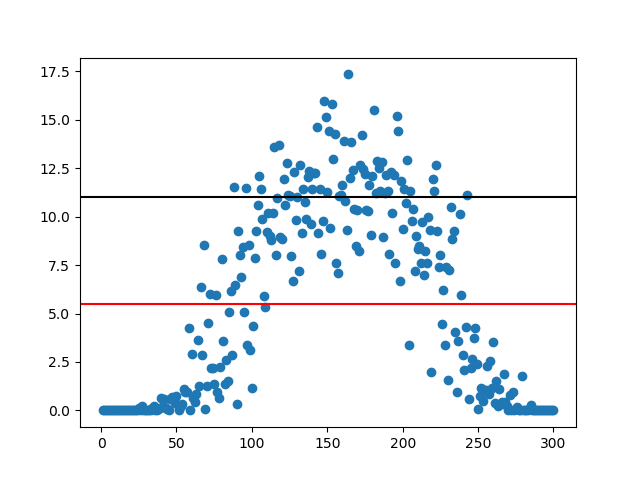

In [19]:
spikeInstant = []
unitNumber = []
force = []
Vt = []
instantaneousFiring = []
g = []
V = []
I = []
nt1 = []
nt2 = []
in1 = []
in2 = []

filename = 'ForcedPSD/datNoRC/MNspk.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    spikeInstant.append(float(line.split()[0]))
    unitNumber.append(int(float(line.split()[1])))
f.close()

filename = 'ForcedPSD/datNoRC/force.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    force.append(float(line.split()[0]))
f.close()

filename = 'ForcedPSD/datNoRC/V.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    Vt.append(float(line.split()[0]))
f.close()

filename = 'ForcedPSD/datNoRC/inputV_I.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    V.append(float(line.split()[0]))
    I.append(float(line.split()[1]))
f.close()

MNSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==recordedMN]
if not any(MNSpikeInstants):
    print "No spikes for this MN"
elif len(MNSpikeInstants)==1:
    print "Length 1..."
else:
    for i in range(len(MNSpikeInstants)-1):
        instantaneousFiring = np.append(instantaneousFiring, 
           [1000/(MNSpikeInstants[i+1]-MNSpikeInstants[i])])
    plt.figure()
    plt.plot(instantaneousFiring, '.')
    plt.title('MN Instantaneous firing rate')
    plt.show()
    
    fs=1/(timeStep_ms*1e-3)
    
    plt.figure()
    plt.plot(t, force)
    plt.title('Force')
    plt.xlabel('t (ms)')
    plt.ylabel('Force (N?)')
    plt.show()
    
#     `boxcar`, `triang`, `blackman`, `hamming`, `hann`, `bartlett`,
#         `flattop`, `parzen`, `bohman`, `blackmanharris`, `nuttall`,
#         `barthann`, `kaiser` (needs beta), `gaussian` (needs standard
#         deviation), `general_gaussian` (needs power, width), `slepian`
#         (needs width), `dpss` (needs normalized half-bandwidth),
#         `chebwin` (needs attenuation), `exponential` (needs decay scale),
#         `tukey` (needs taper fraction)
    
    staticForce = [y for x,y in enumerate(force) if t[x]>2000]
    fr = 10
    nperseg = 4*fs/2/fr
    noverlap = None
    nfft = 8*nperseg
    detrend = False#'constant'
    f2, Pxx = signal.welch(staticForce, fs, ('tukey', 0.1), nperseg, noverlap, nfft, detrend)
    
    plt.figure()
    plt.plot(f2, Pxx)
    plt.title('Force PSD')
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum Density(V^2/Hz)')
#     plt.yscale('log')
    plt.xlim([0, 50])
#     plt.xlim((0, 500))
    plt.show()

plt.figure()
plt.plot(spikeInstant, unitNumber, '.')
plt.title('MNs spikes')
plt.show()

plt.figure()
plt.plot(t, Vt)
plt.title('Mean V(t)')
plt.show()

ensambleFR(spikeInstant, unitNumber, MNQtd, transientPeriod_ms, simDuration_ms)

## With Renshaw

<IPython.core.display.Javascript object>


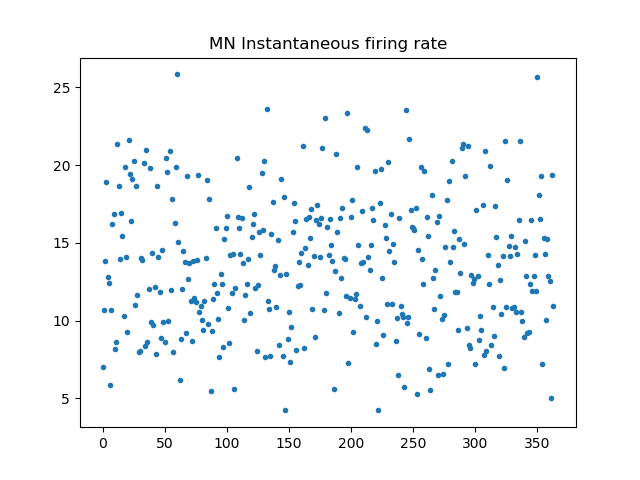

<IPython.core.display.Javascript object>


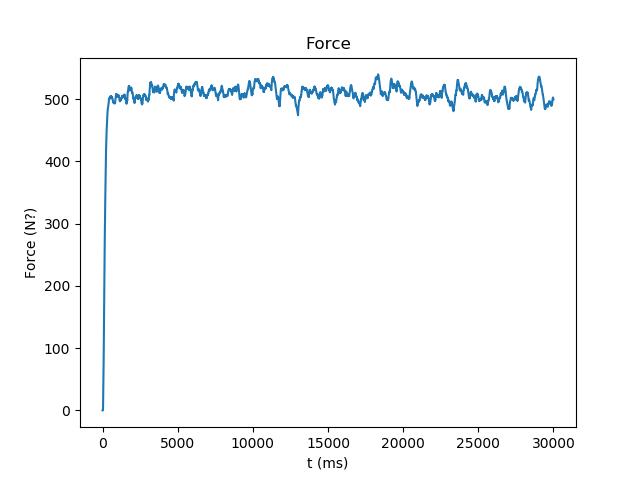

<IPython.core.display.Javascript object>


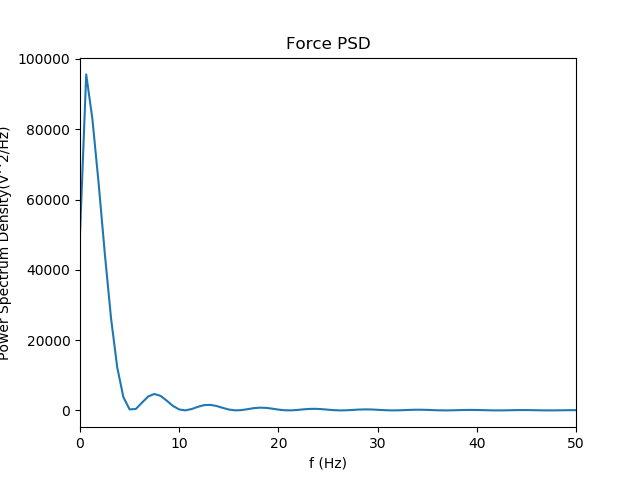

<IPython.core.display.Javascript object>


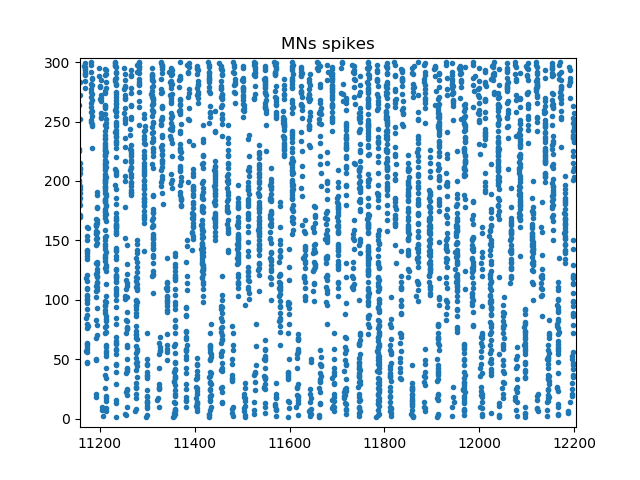

<IPython.core.display.Javascript object>


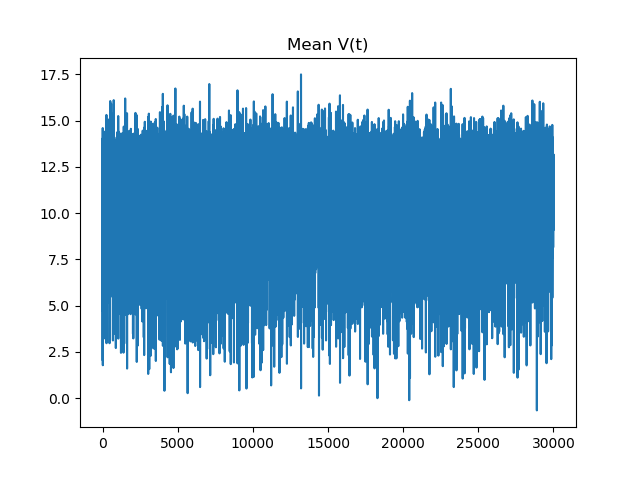

<IPython.core.display.Javascript object>


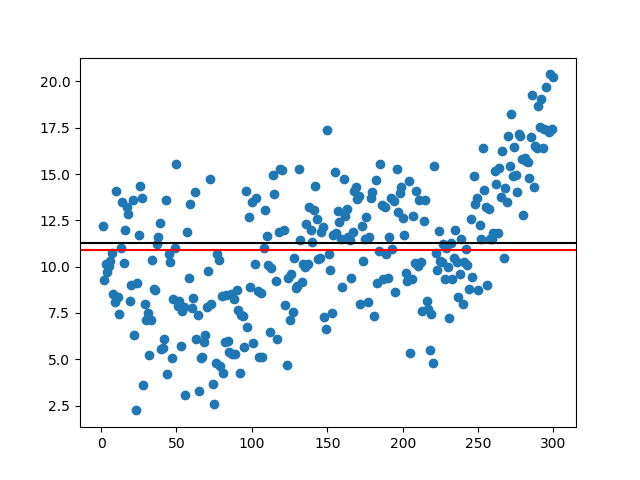

In [20]:
spikeInstant = []
unitNumber = []
force = []
instantaneousFiring = []
g = []
V = []
Vt = []
I = []
nt1 = []
nt2 = []
in1 = []
in2 = []

filename = 'ForcedPSD/MNspk.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    spikeInstant.append(float(line.split()[0]))
    unitNumber.append(int(float(line.split()[1])))
f.close()

filename = 'ForcedPSD/force.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    force.append(float(line.split()[0]))
f.close()

filename = 'ForcedPSD/V.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    Vt.append(float(line.split()[0]))
f.close()

filename = 'ForcedPSD/inputV_I.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    V.append(float(line.split()[0]))
    I.append(float(line.split()[1]))
f.close()

MNSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==recordedMN]
if not any(MNSpikeInstants):
    print "No spikes for this MN"
elif len(MNSpikeInstants)==1:
    print "Length 1..."
else:
    for i in range(len(MNSpikeInstants)-1):
        instantaneousFiring = np.append(instantaneousFiring, 
           [1000/(MNSpikeInstants[i+1]-MNSpikeInstants[i])])
    plt.figure()
    plt.plot(instantaneousFiring, '.')
    plt.title('MN Instantaneous firing rate')
    plt.show()
    
    fs=1/(timeStep_ms*1e-3)
    
    plt.figure()
    plt.plot(t, force)
    plt.title('Force')
    plt.xlabel('t (ms)')
    plt.ylabel('Force (N?)')
    plt.show()
    
#     `boxcar`, `triang`, `blackman`, `hamming`, `hann`, `bartlett`,
#         `flattop`, `parzen`, `bohman`, `blackmanharris`, `nuttall`,
#         `barthann`, `kaiser` (needs beta), `gaussian` (needs standard
#         deviation), `general_gaussian` (needs power, width), `slepian`
#         (needs width), `dpss` (needs normalized half-bandwidth),
#         `chebwin` (needs attenuation), `exponential` (needs decay scale),
#         `tukey` (needs taper fraction)
    
    staticForce = [y for x,y in enumerate(force) if t[x]>2000]
    fr = 10
    nperseg = 4*fs/2/fr
    noverlap = None
    nfft = 8*nperseg
    detrend = False#'constant'
    f2, Pxx = signal.welch(staticForce, fs, ('tukey', 0.1), nperseg, noverlap, nfft, detrend)
    
    plt.figure()
    plt.plot(f2, Pxx)
    plt.title('Force PSD')
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum Density(V^2/Hz)')
#     plt.yscale('log')
    plt.xlim([0, 50])
#     plt.xlim((0, 500))
    plt.show()

plt.figure()
plt.plot(spikeInstant, unitNumber, '.')
plt.title('MNs spikes')
plt.show()

plt.figure()
plt.plot(t, Vt)
plt.title('Mean V(t)')
plt.show()

ensambleFR(spikeInstant, unitNumber, MNQtd, transientPeriod_ms, simDuration_ms)

# Test (with RC)

In [4]:
simDuration_ms = 500
timeStep_ms = 0.05
transientPeriod_ms = 100
t = np.arange(0, simDuration_ms, timeStep_ms)

<IPython.core.display.Javascript object>


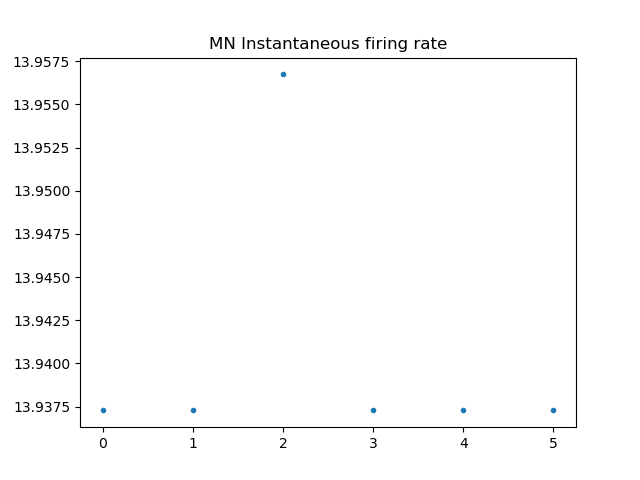

<IPython.core.display.Javascript object>


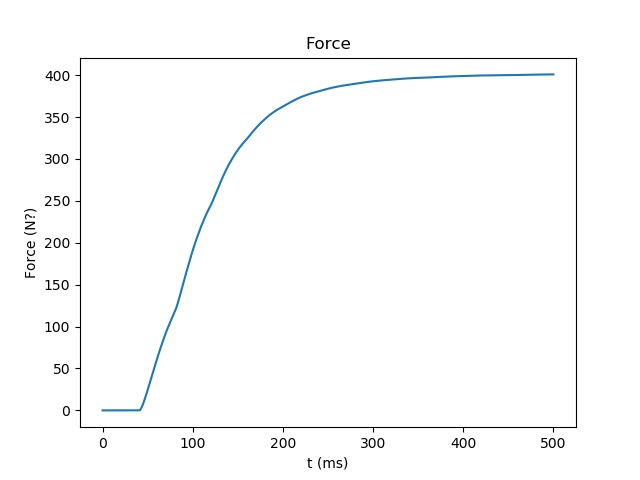

<IPython.core.display.Javascript object>


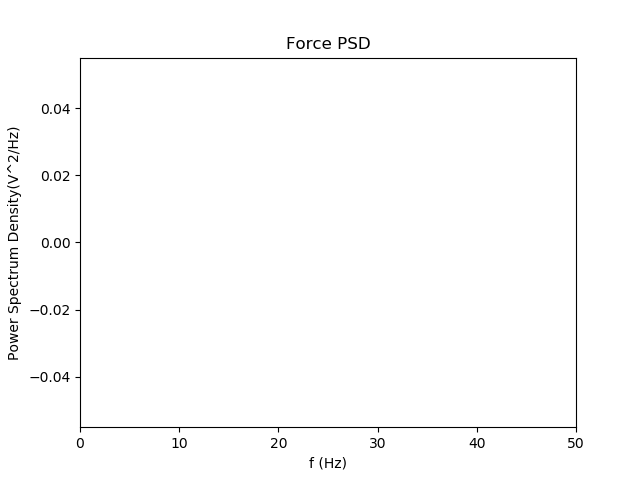

<IPython.core.display.Javascript object>


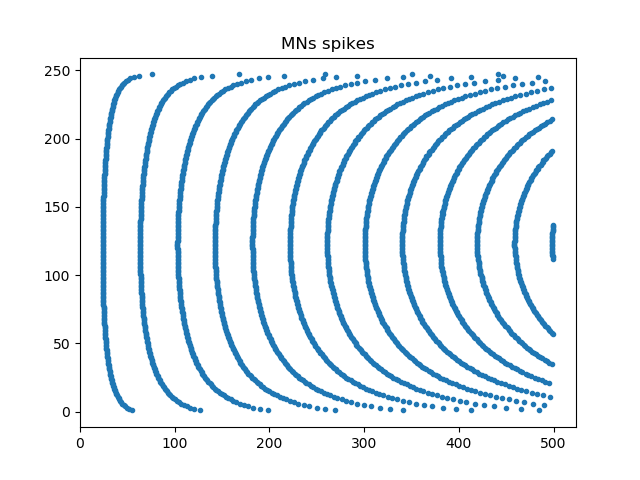

<IPython.core.display.Javascript object>


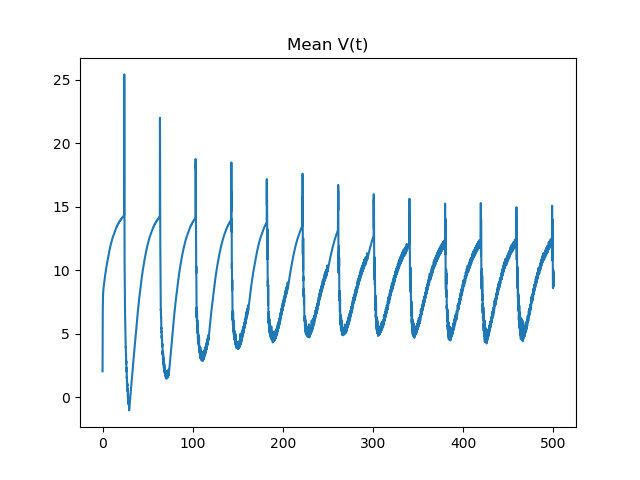

<IPython.core.display.Javascript object>


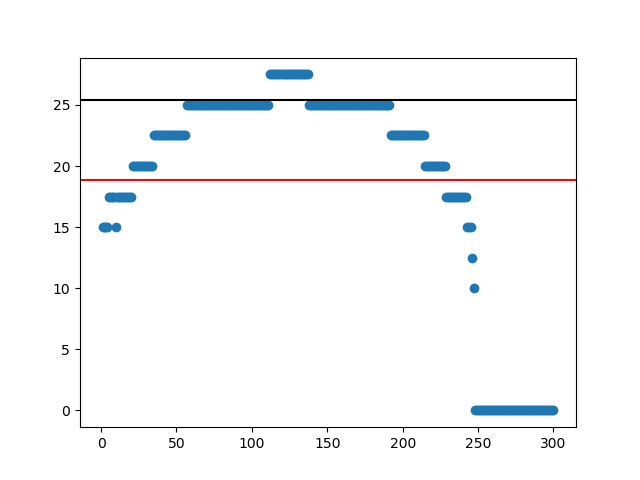

In [35]:
spikeInstant = []
unitNumber = []
force = []
instantaneousFiring = []
g = []
V = []
Vt = []
I = []
nt1 = []
nt2 = []
in1 = []
in2 = []

filename = 'ForcedPSD/test/MNspk.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    spikeInstant.append(float(line.split()[0]))
    unitNumber.append(int(float(line.split()[1])))
f.close()

filename = 'ForcedPSD/test/force.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    force.append(float(line.split()[0]))
f.close()

filename = 'ForcedPSD/test/V.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    Vt.append(float(line.split()[0]))
f.close()

filename = 'ForcedPSD/test/inputV_I.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    V.append(float(line.split()[0]))
    I.append(float(line.split()[1]))
f.close()

MNSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==recordedMN]
if not any(MNSpikeInstants):
    print "No spikes for this MN"
elif len(MNSpikeInstants)==1:
    print "Length 1..."
else:
    for i in range(len(MNSpikeInstants)-1):
        instantaneousFiring = np.append(instantaneousFiring, 
           [1000/(MNSpikeInstants[i+1]-MNSpikeInstants[i])])
    plt.figure()
    plt.plot(instantaneousFiring, '.')
    plt.title('MN Instantaneous firing rate')
    plt.show()
    
    fs=1/(timeStep_ms*1e-3)
    
    plt.figure()
    plt.plot(t, force)
    plt.title('Force')
    plt.xlabel('t (ms)')
    plt.ylabel('Force (N?)')
    plt.show()
    
#     `boxcar`, `triang`, `blackman`, `hamming`, `hann`, `bartlett`,
#         `flattop`, `parzen`, `bohman`, `blackmanharris`, `nuttall`,
#         `barthann`, `kaiser` (needs beta), `gaussian` (needs standard
#         deviation), `general_gaussian` (needs power, width), `slepian`
#         (needs width), `dpss` (needs normalized half-bandwidth),
#         `chebwin` (needs attenuation), `exponential` (needs decay scale),
#         `tukey` (needs taper fraction)
    
    staticForce = [y for x,y in enumerate(force) if t[x]>2000]
    fr = 10
    nperseg = 4*fs/2/fr
    noverlap = None
    nfft = 8*nperseg
    detrend = False#'constant'
    f2, Pxx = signal.welch(staticForce, fs, ('tukey', 0.1), nperseg, noverlap, nfft, detrend)
    
    plt.figure()
    plt.plot(f2, Pxx)
    plt.title('Force PSD')
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum Density(V^2/Hz)')
#     plt.yscale('log')
    plt.xlim([0, 50])
#     plt.xlim((0, 500))
    plt.show()

plt.figure()
plt.plot(spikeInstant, unitNumber, '.')
plt.title('MNs spikes')
plt.show()

plt.figure()
plt.plot(t, Vt)
plt.title('Mean V(t)')
plt.show()

ensambleFR(spikeInstant, unitNumber, MNQtd, transientPeriod_ms, simDuration_ms)

<IPython.core.display.Javascript object>


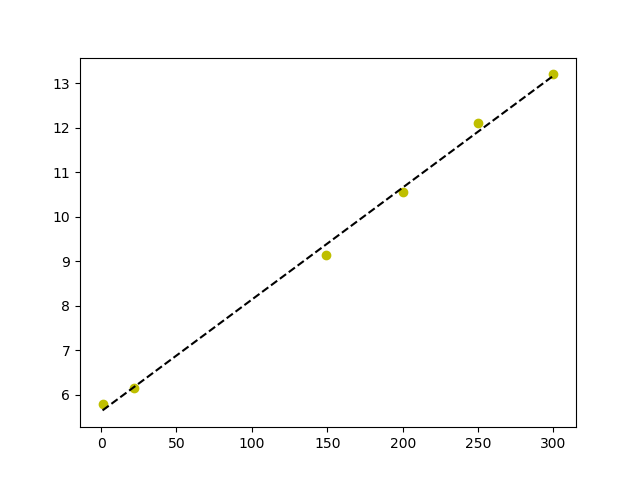

In [32]:
x=[1, 22, 149, 200, 250, 300]
y=[5.8, 6.15, 9.15, 10.55, 12.10, 13.2]
fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.figure()
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.show()

In [33]:
m

0.02514284677755809

In [34]:
b

5.628049211848576